In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Régression linéaire multiple

In [ ]:
# chargement du dataset
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Extraction des colonnes X
X = df[['TV', 'Radio', 'Newspaper']]

#X = df[['TV', 'Radio']]
# Extraction de la colonne y
y = df['Sales']

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape)
print(y.shape)


(200, 3)
(200,)


In [ ]:
X.shape

(200, 3)

In [ ]:
y=y.values.reshape(-1,1)
y.shape

(200, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

#from sklearn.preprocessing import MinMaxScaler
# create an instance of MinMaxScaler
#scaler = MinMaxScaler()
# fit and transform the x train data qnd x test
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

In [ ]:
print(X_test.shape)
print(X_train.shape)

(40, 4)
(160, 4)


In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(4,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


In [ ]:
def model(X, theta):
    return X.dot(theta)

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [ ]:
cost_function(X_train, y_train, theta)

91.74091996597303

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
n_iterations = 10000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
theta_final

array([[ 4.60161031],
       [ 1.49451794],
       [ 0.088192  ],
       [15.330625  ]])

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)

In [ ]:
predictions_train

array([[11.91465765],
       [15.32881375],
       [ 9.91093345],
       [ 9.46132618],
       [17.23412363],
       [ 7.22972412],
       [10.35454191],
       [15.23876611],
       [11.14036535],
       [11.71856758],
       [13.85060866],
       [14.66570876],
       [10.44983379],
       [ 9.28550764],
       [ 9.02357336],
       [12.47875166],
       [10.48712079],
       [24.99748731],
       [ 7.88523289],
       [15.8640533 ],
       [21.30888748],
       [17.00814942],
       [12.79206695],
       [ 9.84041429],
       [21.01070892],
       [ 7.48343928],
       [23.52204082],
       [ 7.05636619],
       [12.56968457],
       [10.08676368],
       [11.1715446 ],
       [ 9.12566707],
       [16.92180225],
       [17.90167068],
       [15.63428805],
       [18.26514616],
       [15.51584207],
       [19.23176429],
       [17.48701831],
       [21.82555114],
       [10.58560762],
       [14.22101675],
       [10.75778538],
       [18.10690693],
       [ 9.94580615],
       [17

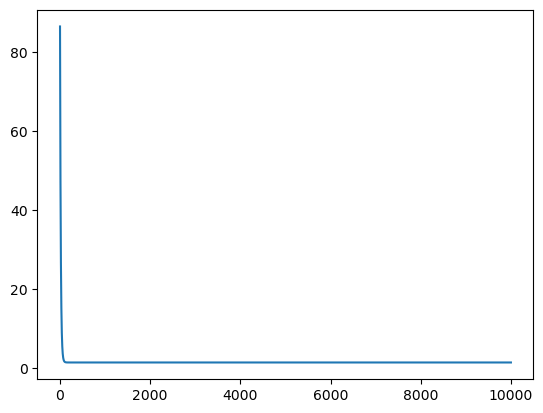

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y_test, predictions_test)

0.8753224470083143

In [ ]:
coef_determination(y_train, predictions_train)

0.9001416005862131

###  Régression polynômiale multivariée de degré 2

In [ ]:
# chargement du dataset
data = pd.read_csv("advertising.csv")

In [ ]:
# Extraction des colonnes X
X = data[['TV', 'Radio', 'Newspaper']]

#X = df[['TV', 'Radio']]
# Extraction de la colonne y
y = data['Sales']
a=X.iloc[:,0:1].values
b=X.iloc[:,1:2].values
c=X.iloc[:,2:3].values
print(a)


[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [ ]:
X = np.hstack((a,b,c,a**2,b**2,c**2,a*b,a*c,b*c))

In [ ]:
X.shape

(200, 9)

In [ ]:
X

array([[2.301000e+02, 3.780000e+01, 6.920000e+01, ..., 8.697780e+03,
        1.592292e+04, 2.615760e+03],
       [4.450000e+01, 3.930000e+01, 4.510000e+01, ..., 1.748850e+03,
        2.006950e+03, 1.772430e+03],
       [1.720000e+01, 4.590000e+01, 6.930000e+01, ..., 7.894800e+02,
        1.191960e+03, 3.180870e+03],
       ...,
       [1.770000e+02, 9.300000e+00, 6.400000e+00, ..., 1.646100e+03,
        1.132800e+03, 5.952000e+01],
       [2.836000e+02, 4.200000e+01, 6.620000e+01, ..., 1.191120e+04,
        1.877432e+04, 2.780400e+03],
       [2.321000e+02, 8.600000e+00, 8.700000e+00, ..., 1.996060e+03,
        2.019270e+03, 7.482000e+01]])

In [ ]:
y=y.values.reshape(-1,1)
y.shape

(200, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160, 9)

In [ ]:

X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

#from sklearn.preprocessing import StandardScaler
# Initialisez le StandardScaler
#scaler = StandardScaler()
# Normalisez X_train et X_test
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))


In [ ]:
X_train.shape

(160, 10)

In [ ]:
X_train

array([[-0.35164069, -0.36029141, -0.3590613 , ..., -0.14686712,
        -0.34669868,  1.        ],
       [-0.34676817, -0.3601636 , -0.36039525, ..., -0.2704214 ,
        -0.35615216,  1.        ],
       [-0.35746375, -0.35877374, -0.35810277, ..., -0.24006721,
        -0.28604781,  1.        ],
       ...,
       [-0.34351716, -0.35823057, -0.3561937 , ...,  0.66506219,
        -0.20302888,  1.        ],
       [-0.34767877, -0.36010769, -0.35950062, ..., -0.12809913,
        -0.34684805,  1.        ],
       [-0.33852483, -0.3600997 , -0.35919709, ...,  0.11806049,
        -0.34364177,  1.        ]])

In [ ]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [ ]:
#def model(X, theta):
    #return X.dot(theta)
def model(X, theta):
    return np.dot(X, theta)

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [ ]:
cost_function(X_train, y_train, theta)

74.28430598427326

In [ ]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

In [ ]:
# Entrainement du modèle
n_iterations = 10000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [ ]:
theta_final

array([[-1.03187977],
       [-3.08723893],
       [-2.53275551],
       [ 1.27041938],
       [ 1.4499159 ],
       [-3.594568  ],
       [ 8.56183517],
       [ 1.89775269],
       [-1.29092133],
       [10.23807425]])

In [ ]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_test = model(X_test, theta_final)
predictions_train = model(X_train, theta_final)

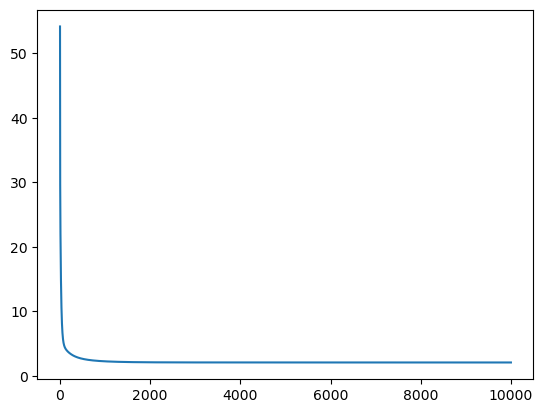

In [ ]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v


In [ ]:
coef_determination(y_test, predictions_test)

0.8424098927323636

In [ ]:
coef_determination(y_train, predictions_train)

0.8471731704870359